 Columns :
* index: Unique identifier for each row in the dataframe.
* age: Age of the patient.
* sex: Gender of the patient 
* cp: Chest pain type 
* trtbps: Resting blood pressure 
* chol: Serum cholesterol in mg/dl.
* fbs: Fasting blood sugar 
* restecg: Resting electrocardiographic results 
* thalachh: Maximum heart rate achieved.
* exng: Exercise induced angina 
* oldpeak: ST depression induced by exercise relative to rest.
* slp: Slope of the peak exercise ST segment 
* caa: Number of major vessels 
* thall: Thalassemia 
* output: Diagnosis of heart disease (1 = true; 0 = false).

In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from colorama import Fore, init
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
for i in df.columns:
    print(i,':',df[i].unique())

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trtbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs : [

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<Axes: >

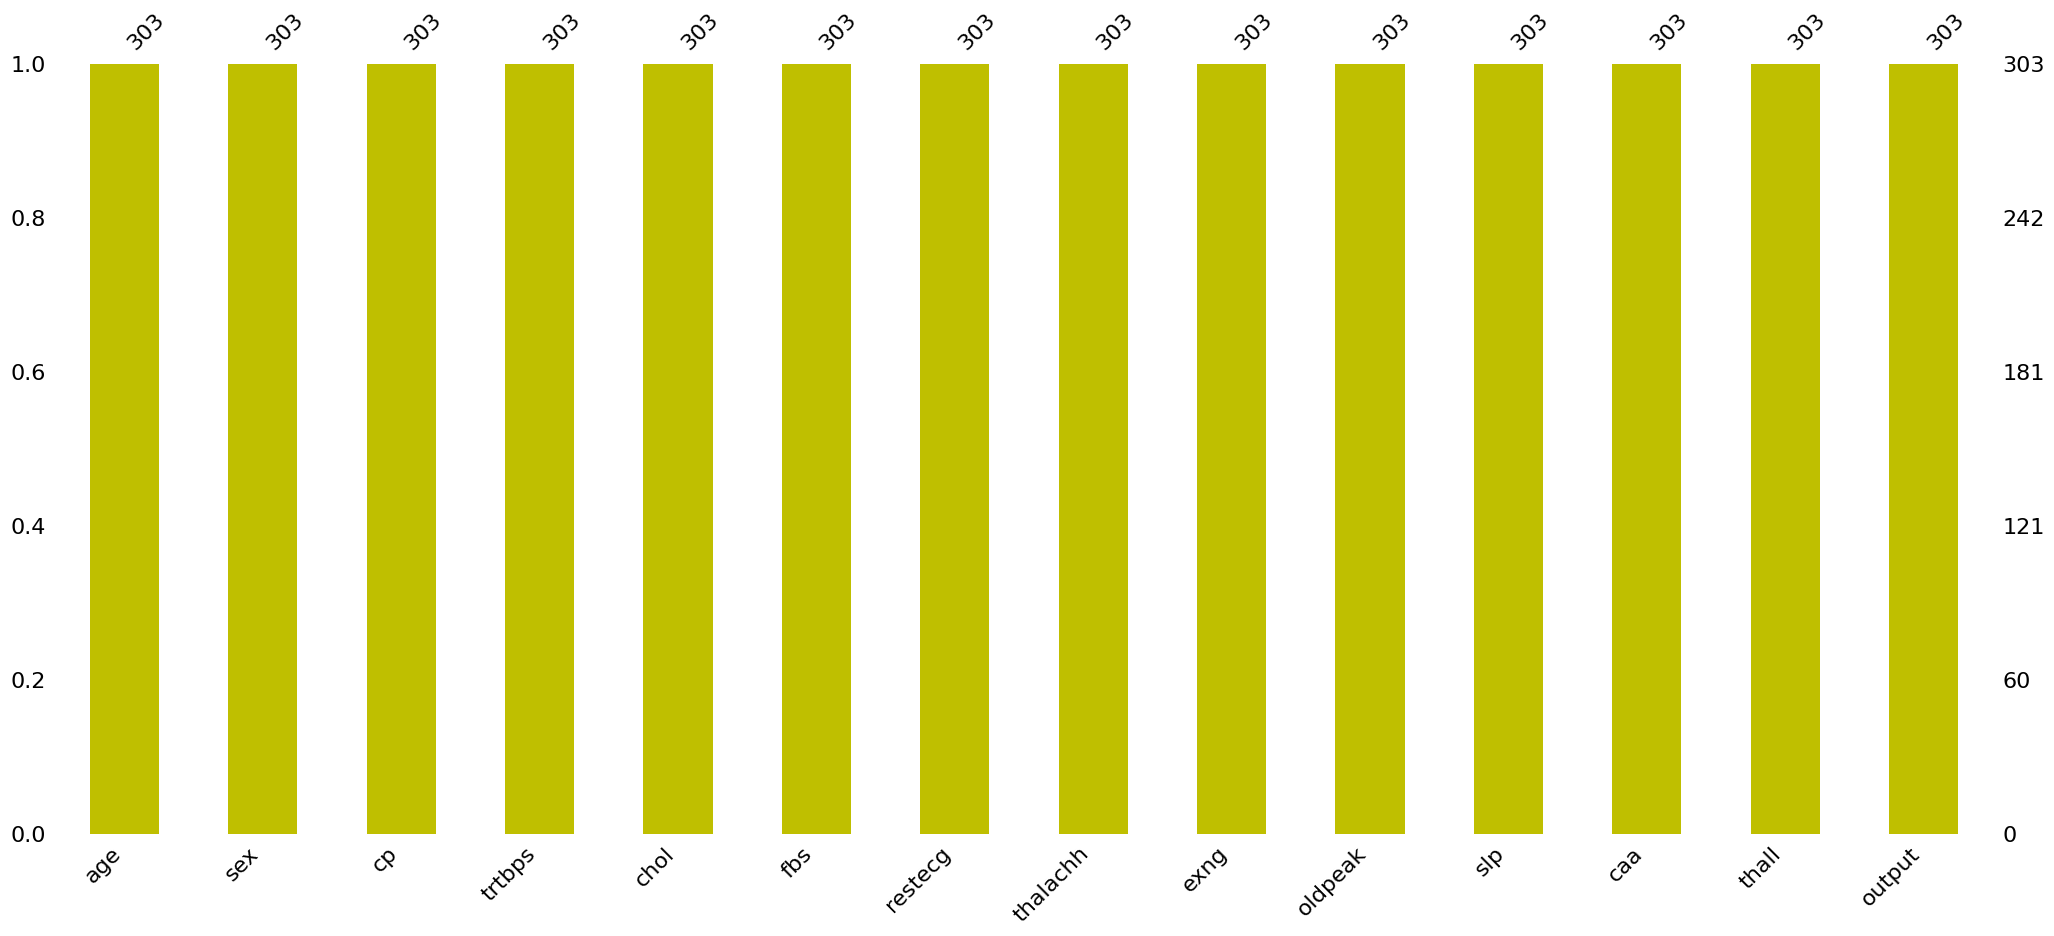

In [4]:
msno.bar(df, color = 'y')

In [5]:
  df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
print(f"Summary Of The Dataset with numerical columns :")
df.describe().style.set_properties(**{"background-color": "#121d6b","color":"#e9c46a","border": "1.5px solid black"})

Summary Of The Dataset with numerical columns :


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.420530,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.047970,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.500000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

age: 41 distinct values
sex: 2 distinct values
cp: 4 distinct values
trtbps: 49 distinct values
chol: 152 distinct values
fbs: 2 distinct values
restecg: 3 distinct values
thalachh: 91 distinct values
exng: 2 distinct values
oldpeak: 40 distinct values
slp: 3 distinct values
caa: 5 distinct values
thall: 4 distinct values
output: 2 distinct values


In [9]:
specified_columns = ['age', 'sex', 'cp', 'fbs', 'restecg', 'exng','slp', 'caa', 'thall', 'output']

for col in specified_columns:
    total_unique_values = df[col].nunique()
    print(f'Total unique values for {col}: {total_unique_values}')

    top_values = df[col].value_counts()

    colors = [Fore.RED, Fore.GREEN, Fore.YELLOW, Fore.BLUE, Fore.MAGENTA, Fore.CYAN, Fore.WHITE, Fore.LIGHTBLACK_EX, Fore.LIGHTRED_EX, Fore.LIGHTGREEN_EX]

    for i, (value, count) in enumerate(top_values.items()):
        color = colors[i % len(colors)]
        print(f'{color}{value}: {count}{Fore.RESET}')

    print('\n' + '=' * 30 + '\n')  

Total unique values for age: 41
58: 19
57: 17
54: 16
59: 14
52: 13
51: 12
62: 11
56: 11
44: 11
60: 11
41: 10
64: 10
67: 9
63: 9
43: 8
55: 8
42: 8
61: 8
65: 8
53: 8
45: 8
50: 7
48: 7
46: 7
66: 7
47: 5
49: 5
70: 4
39: 4
68: 4
35: 4
71: 3
40: 3
69: 3
34: 2
37: 2
38: 2
29: 1
74: 1
76: 1
77: 1


Total unique values for sex: 2
1: 206
0: 96


Total unique values for cp: 4
0: 143
2: 86
1: 50
3: 23


Total unique values for fbs: 2
0: 257
1: 45


Total unique values for restecg: 3
1: 151
0: 147
2: 4


Total unique values for exng: 2
0: 203
1: 99


Total unique values for slp: 3
2: 141
1: 140
0: 21


Total unique values for caa: 5
0: 175
1: 65
2: 38
3: 20
4: 4


Total unique values for thall: 4
2: 165
3: 117
1: 18
0: 2


Total unique values for output: 2
1: 164
0: 138




<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 20px; font-weight: bold;">
        4. Exploration Data 
    </p>
</div>


In [10]:
df_numericals = df.select_dtypes(['int64','float64'])
numericals = [i for i in df_numericals.columns]
print('numericals: ', numericals)

numericals:  ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']


<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
        4.1 Visualization 
    </p>
</div>


<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
        Univariate Analysis
    </p>
</div>


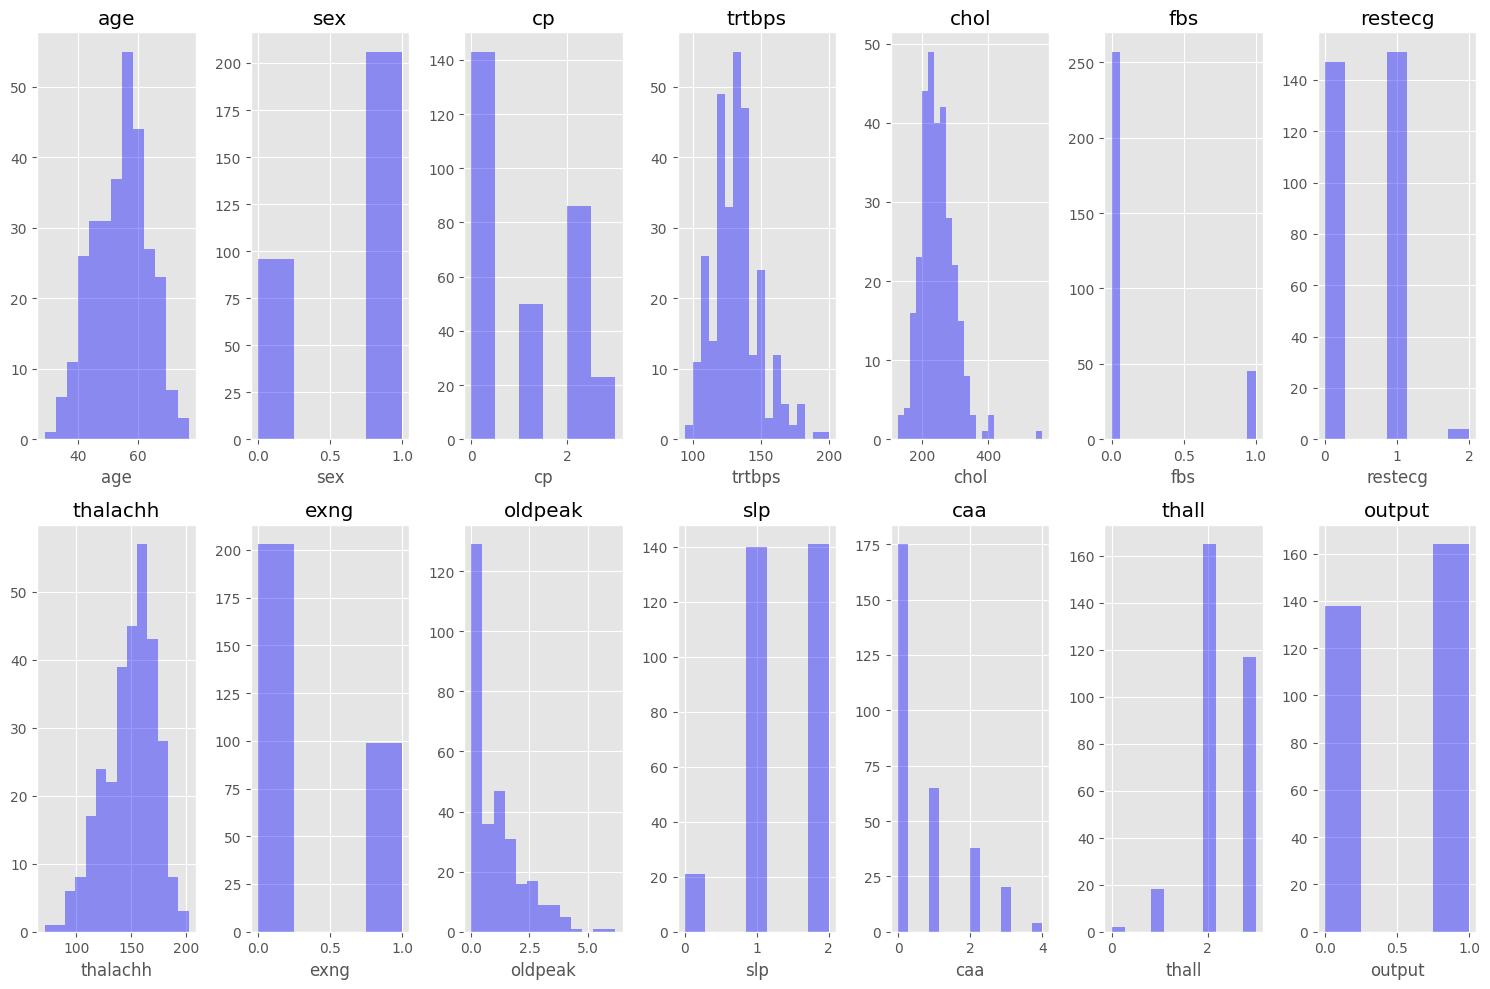

In [11]:
plt.style.use('ggplot')

numeric_columns = df_numericals.columns


plt.figure(figsize=(15, 10))  

for i, variable in enumerate(numeric_columns):
    plt.subplot(2, 7, i + 1)  # 2 rows and 3 columns
    sns.distplot(df_numericals[variable], kde=False, color='blue')
    plt.tight_layout()
    plt.title(variable)

<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
        Bivariate Analysis
    </p>
</div>


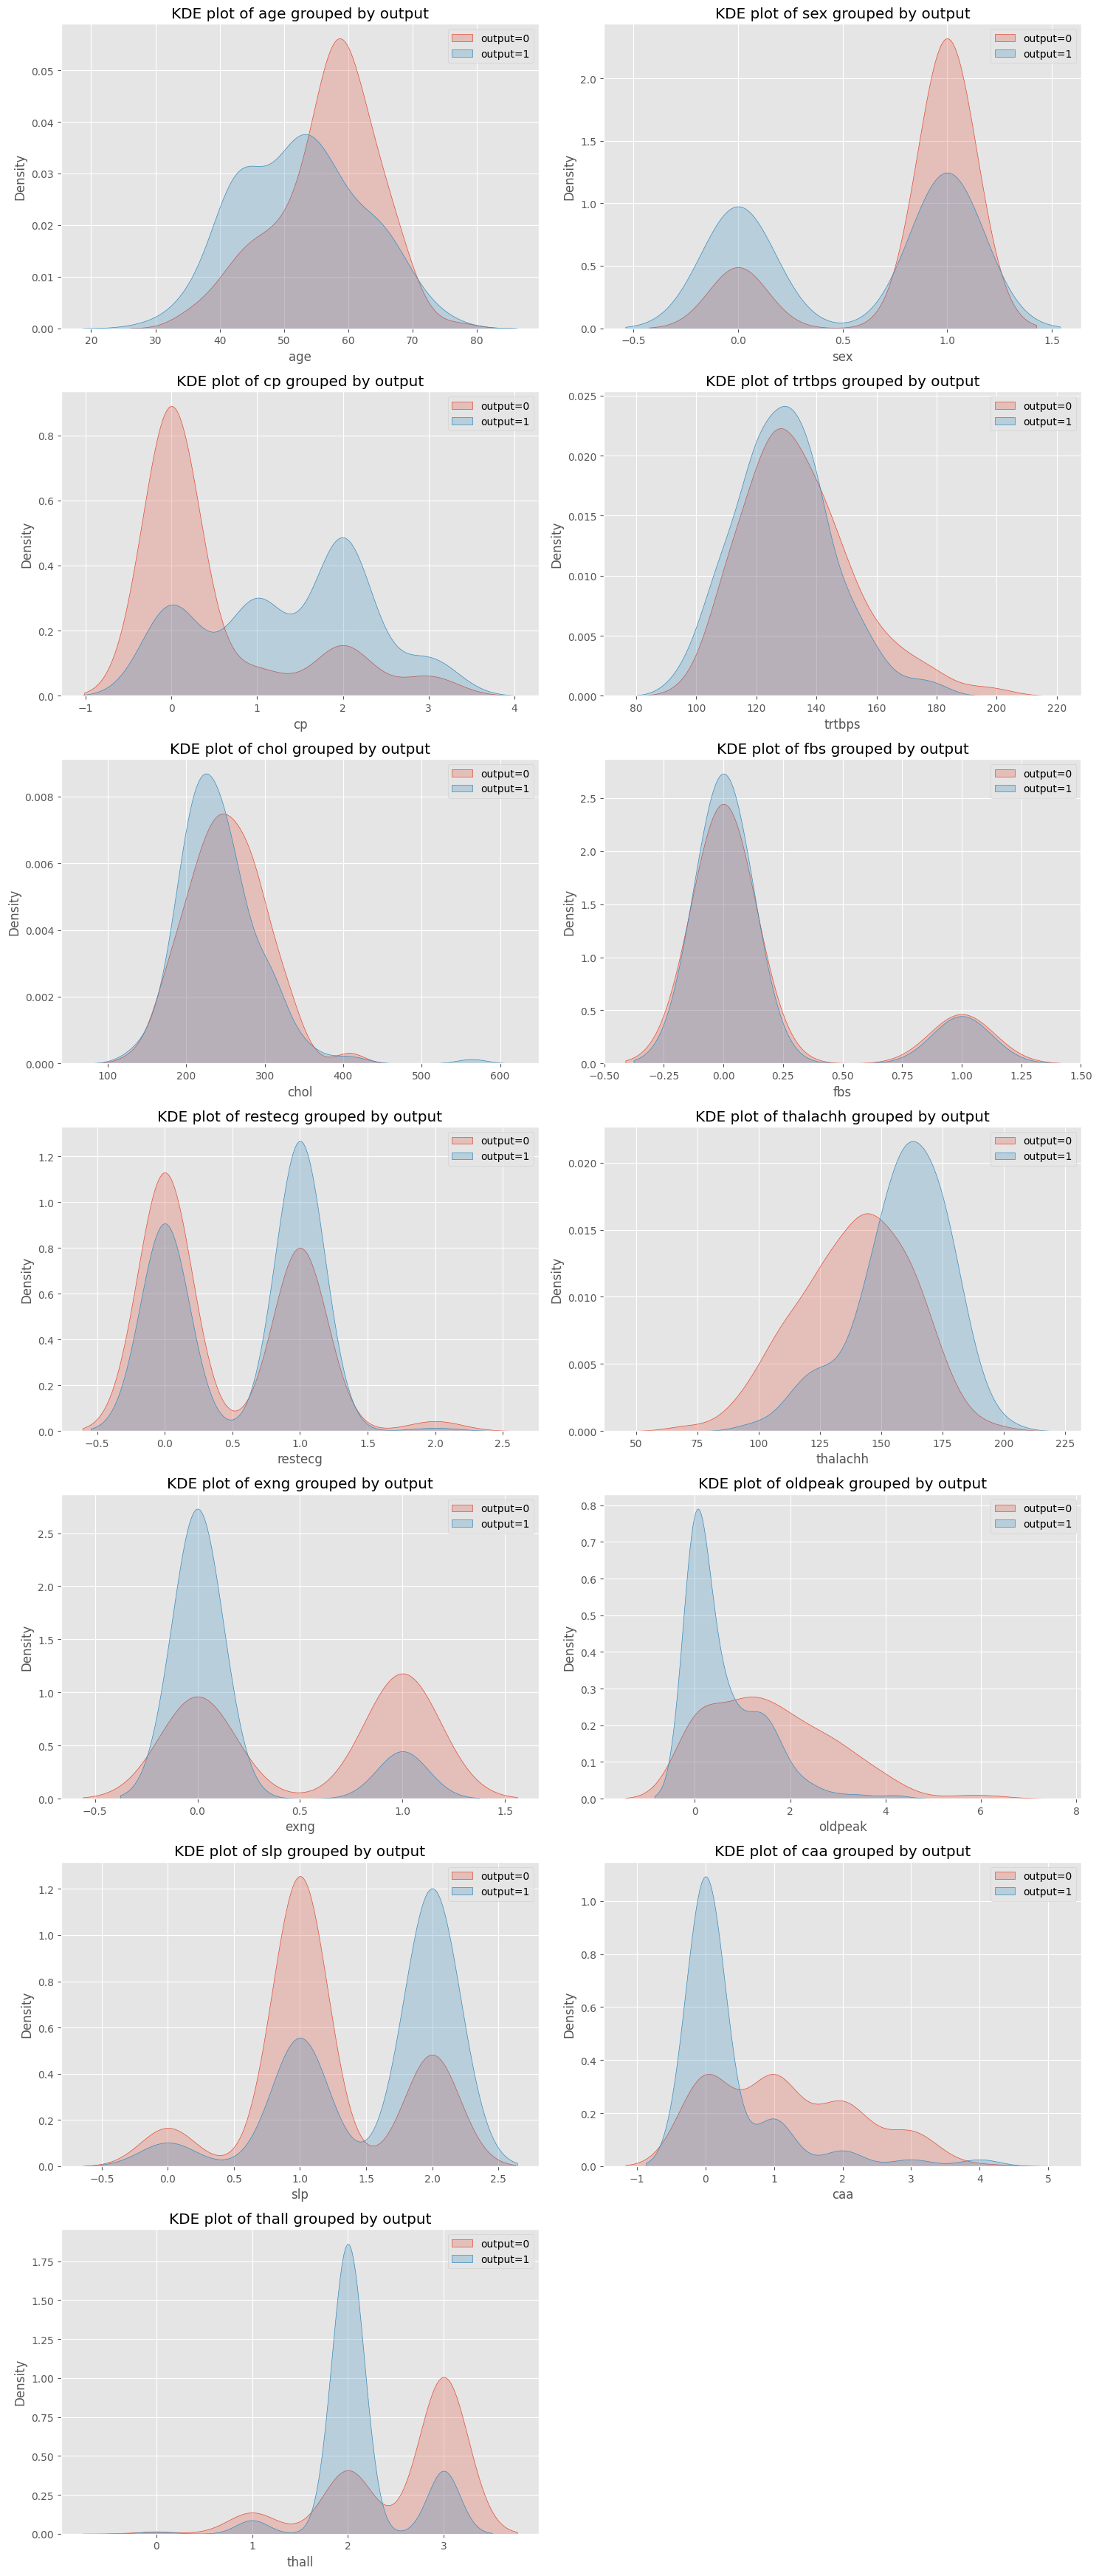

In [12]:
num_columns = len(df.columns) - 1  
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(15, 5*num_rows))


for i, column in enumerate(df.columns.drop('output')):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=df[df['output'] == 0][column], label='output=0', fill=True)
    sns.kdeplot(data=df[df['output'] == 1][column], label='output=1', fill=True)
    plt.title(f'KDE plot of {column} grouped by output')
    plt.legend()

plt.tight_layout()
plt.show()

<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
        Multivariate Analysis
    </p>
</div>


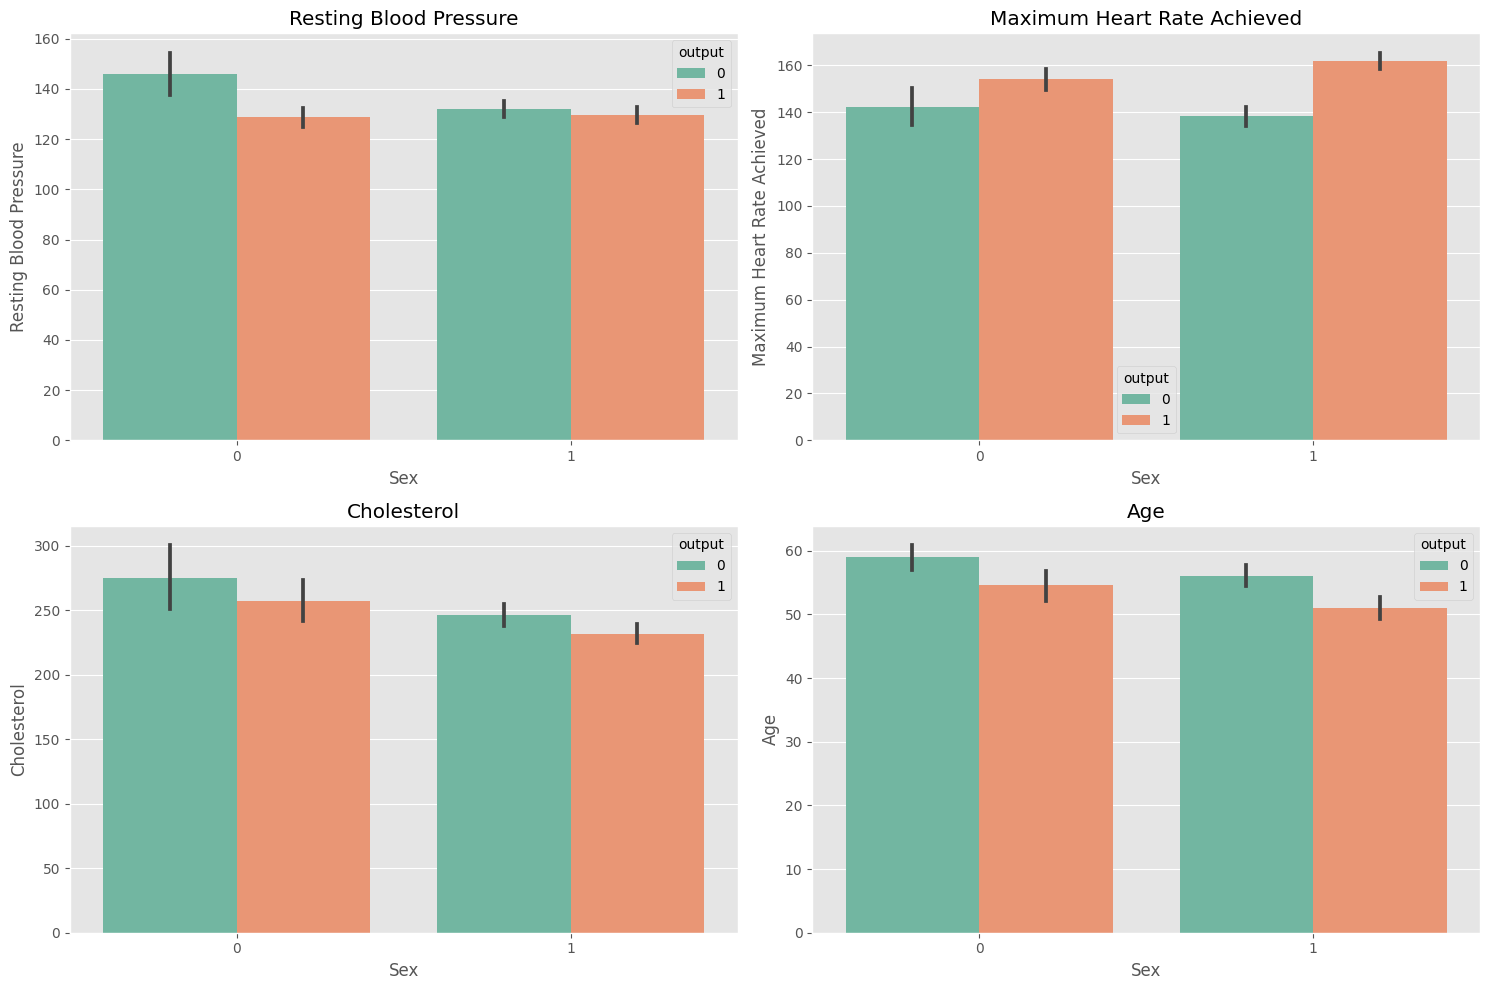

In [13]:
plt.figure(figsize=(15, 10))

# Subplot 1: 
plt.subplot(2, 2, 1)
plt.title("Resting Blood Pressure")
sns.barplot(x='sex', y='trtbps', hue='output', data=df, palette='Set2')
plt.xlabel('Sex')
plt.ylabel('Resting Blood Pressure')

# Subplot 2: 
plt.subplot(2, 2, 2)
plt.title("Maximum Heart Rate Achieved")
sns.barplot(x='sex', y='thalachh', hue='output', data=df, palette='Set2')
plt.xlabel('Sex')
plt.ylabel('Maximum Heart Rate Achieved')

# Subplot 3: 
plt.subplot(2, 2, 3)
plt.title("Cholesterol")
sns.barplot(x='sex', y='chol', hue='output', data=df, palette='Set2')
plt.xlabel('Sex')
plt.ylabel('Cholesterol')

# Subplot 4: 
plt.subplot(2, 2, 4)
plt.title("Age")
sns.barplot(x='sex', y='age', hue='output', data=df, palette='Set2')
plt.xlabel('Sex')
plt.ylabel('Age')

plt.tight_layout()

plt.show()


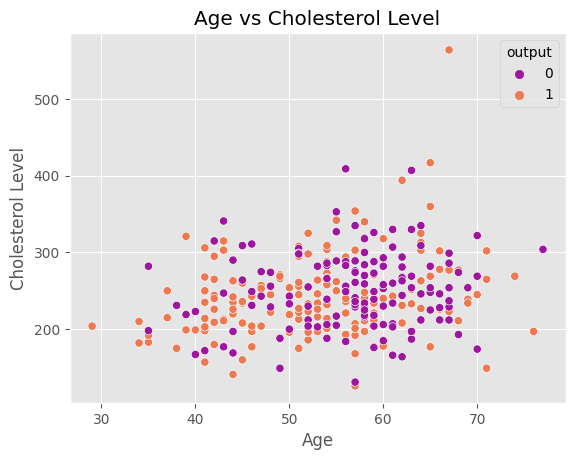

In [14]:
sns.scatterplot(x='age', y='chol', hue='output', data=df,palette='plasma')
plt.title('Age vs Cholesterol Level')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.show()

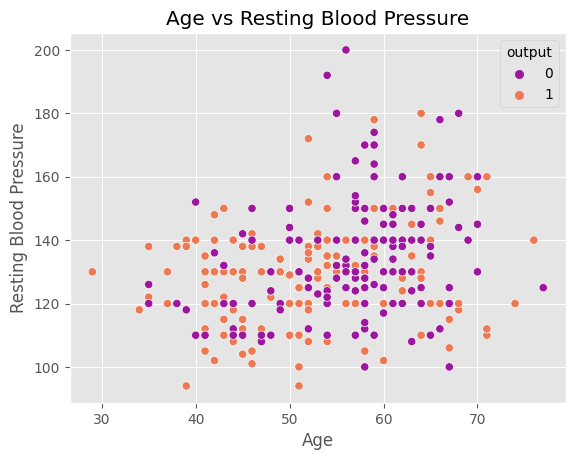

In [15]:
sns.scatterplot(x='age', y='trtbps', hue='output', data=df,palette='plasma')
plt.title('Age vs Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.show()

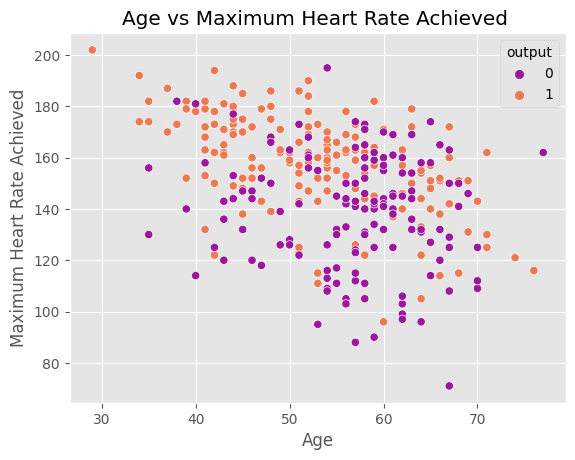

In [16]:
sns.scatterplot(x='age', y='thalachh', hue='output', data=df,palette='plasma' )
plt.title('Age vs Maximum Heart Rate Achieved ')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()

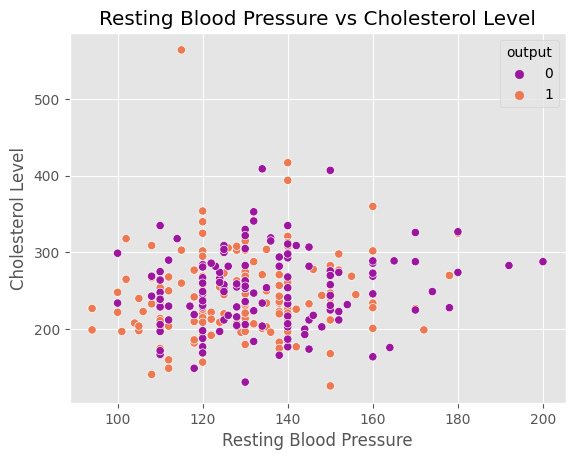

In [17]:
sns.scatterplot(x='trtbps', y='chol', hue='output', data=df,palette='plasma' )
plt.title('Resting Blood Pressure vs Cholesterol Level')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Cholesterol Level')
plt.show()

<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
        4.2 Correlation Matrix 
    </p>
</div>


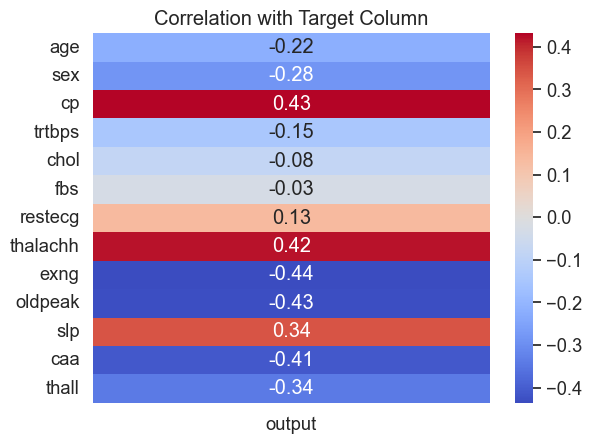

In [18]:
corr = df.corr()

target_corr = corr['output'].drop('output')

sns.set(font_scale=1.2)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Target Column')
plt.show()

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 20px; font-weight: bold;">
        5.Data Preparation
    </p>
</div>


In [19]:
df1 = df.copy()

<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
        5.1 Imbalanced Data
    </p>
</div>


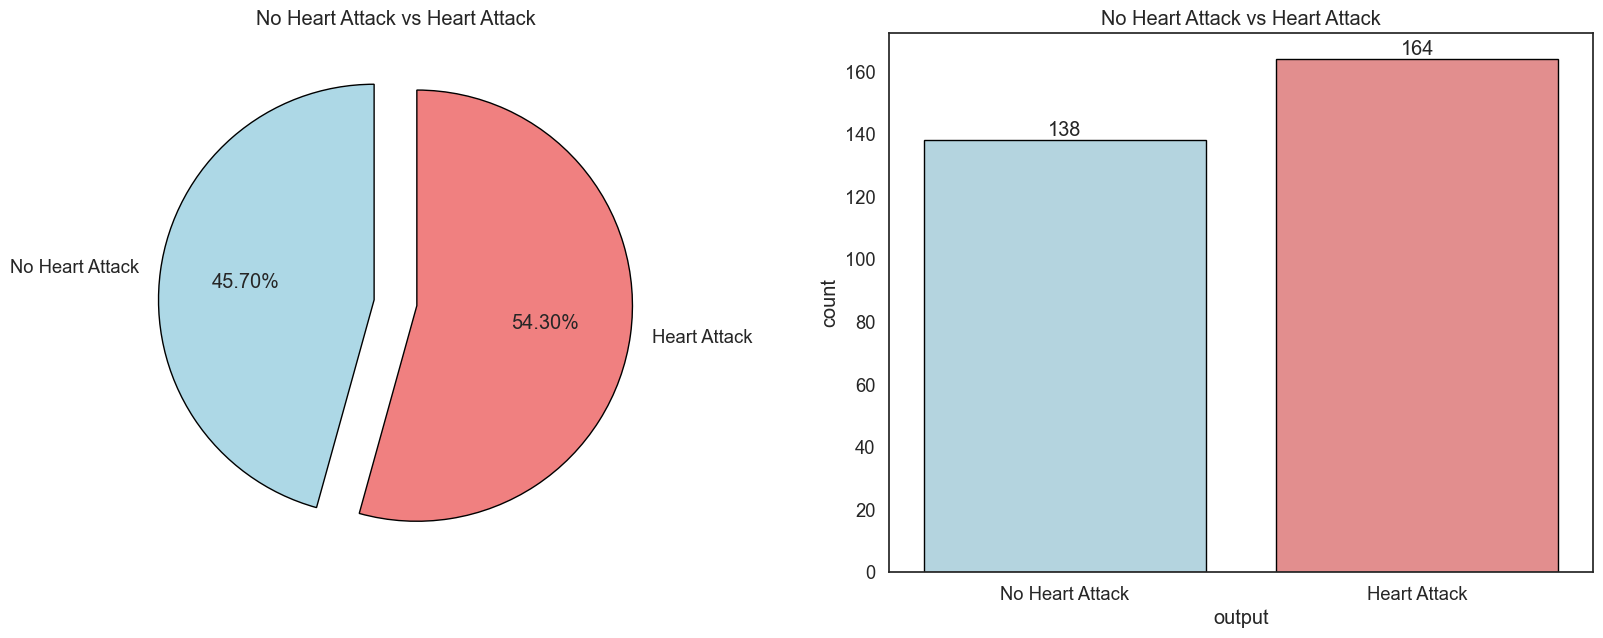

In [20]:
palette = ["#FF0000", "#0000FF"]

Diabetes_count = df1['output'].value_counts()[1]
No_Diabetes_count = df1['output'].value_counts()[0]
total_count = len(df)
diabetes_percentage = (Diabetes_count / total_count) * 100
no_diabetes_percentage = (No_Diabetes_count / total_count) * 100

pie_values = [no_diabetes_percentage, diabetes_percentage]

colors = ['lightblue', 'lightcoral']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
# First subplot - Pie chart
plt.subplot(1, 2, 1)
plt.pie(pie_values, labels=['No Heart Attack', 'Heart Attack'],
        autopct='%1.2f%%',
        startangle=90,
        explode=(0.1, 0.1),
        colors=colors,  # Use the defined colors
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('No Heart Attack vs Heart Attack')

# Second subplot - Countplot
plt.subplot(1, 2, 2)
ax = sns.countplot(data=df,
                x='output',
                palette=colors,  # Use the defined colors
                edgecolor='black')
for i in ax.containers:
    ax.bar_label(i)
ax.set_xticks([0, 1])  # Set ticks manually to match the categories
ax.set_xticklabels(['No Heart Attack', 'Heart Attack'])

plt.title('No Heart Attack vs Heart Attack')
plt.show()


"The data regarding heart attacks is imbalanced, with the number of observations experiencing a heart attack totaling 164, while those not experiencing a heart attack amount to only 138. This condition creates an imbalance in the class distribution, where the 'Heart Attack' class constitutes the majority, while the 'No Heart Attack' class is in the minority. This imbalance can impact the performance of machine learning models, as models tend to be biased towards predicting the majority class. Therefore, strategies for handling imbalanced data may be necessary to enhance the predictive quality of the model, such as oversampling or undersampling        "
  


<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
        5.2 Outliers
    </p>
</div>


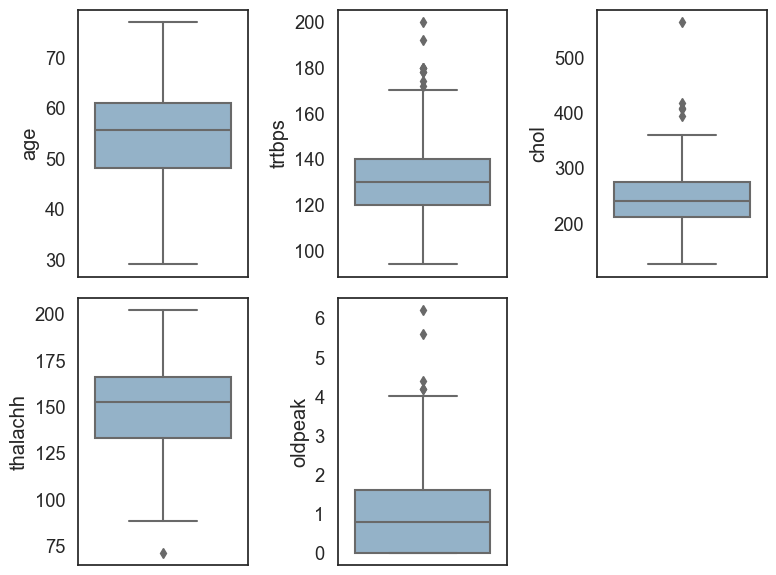

In [21]:
numerical_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

plt.figure(figsize=(8, 6))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df1[column])

plt.tight_layout()

Outliers are data points that significantly differ from the majority of the observations in a dataset. In other words, outliers are values that are unusually high or low compared to the rest of the data. These observations may be genuine extreme values or may indicate errors in the data collection process.

<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
        RobustScaler
    </p>
</div>


In [22]:
features_to_scale_robust = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']


robust_scaler = RobustScaler()

df1[features_to_scale_robust] = robust_scaler.fit_transform(df1[features_to_scale_robust])

def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

for feature in features_to_scale_robust:
    num_outliers = count_outliers(df1[feature])
    print(f'Number of outliers in {feature}: {num_outliers}')


Number of outliers in age: 0
Number of outliers in trtbps: 9
Number of outliers in chol: 5
Number of outliers in thalachh: 1
Number of outliers in oldpeak: 5


In [23]:
X = df1.drop('output', axis=1)
y = df1['output']

In [24]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.576923,1,3,0.75,-0.117647,1,0,-0.076336,0,0.9375,0,0,1
1,-1.423077,1,2,0.00,0.149020,0,1,1.053435,0,1.6875,0,0,2
2,-1.115385,0,1,0.00,-0.572549,0,0,0.595420,0,0.3750,2,0,2
3,0.038462,1,1,-0.50,-0.070588,0,1,0.778626,0,0.0000,2,0,2
4,0.115385,0,0,-0.50,1.780392,0,1,0.320611,1,-0.1250,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.115385,0,0,0.50,0.007843,0,1,-0.900763,1,-0.3750,1,0,3
299,-0.807692,1,3,-1.00,0.368627,0,1,-0.625954,0,0.2500,1,0,3
300,0.961538,1,0,0.70,-0.745098,1,1,-0.351145,0,1.6250,1,2,3
301,0.115385,1,0,0.00,-1.717647,0,1,-1.145038,1,0.2500,1,1,3


<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
        MinMax and SMOTE
    </p>
</div>


In [25]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Display descriptive statistics
X_resampled.describe().T.style.background_gradient(axis=0, cmap='Set3')

,count,mean,std,min,25%,50%,75%,max
age,328.000000,0.535183,0.186996,0.000000,0.395833,0.562500,0.666667,1.000000
sex,328.000000,0.689024,0.463600,0.000000,0.000000,1.000000,1.000000,1.000000
cp,328.000000,0.302602,0.339148,0.000000,0.000000,0.219233,0.666667,1.000000
trtbps,328.000000,0.357559,0.163659,0.000000,0.245283,0.339623,0.433962,1.000000
chol,328.000000,0.275445,0.116886,0.000000,0.196347,0.263699,0.340183,1.000000
fbs,328.000000,0.161065,0.367565,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,328.000000,0.252546,0.261567,0.000000,0.000000,0.011613,0.500000,1.000000
thalachh,328.000000,0.592730,0.174013,0.000000,0.465649,0.618321,0.717333,1.000000
exng,328.000000,0.338415,0.473893,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,328.000000,0.173812,0.189472,0.000000,0.000000,0.129032,0.290323,1.000000


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [37]:
X_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
183,0.437500,1.0,0.000000,0.528302,0.267123,0.0,0.0,0.435115,0.0,0.419355,0.5,0.00,1.000000
17,0.770833,0.0,1.000000,0.528302,0.228311,0.0,0.5,0.328244,0.0,0.419355,0.0,0.00,0.666667
24,0.229167,1.0,1.000000,0.433962,0.166667,0.0,0.5,0.816794,1.0,0.225806,1.0,0.00,1.000000
132,0.270833,1.0,0.333333,0.245283,0.385845,0.0,0.5,0.694656,0.0,0.000000,1.0,0.00,0.666667
113,0.291667,1.0,0.000000,0.150943,0.194064,0.0,0.5,0.687023,0.0,0.000000,1.0,0.00,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.250000,1.0,0.000000,0.150943,0.105023,0.0,0.0,0.664122,0.0,0.000000,1.0,0.00,1.000000
71,0.458333,1.0,0.666667,0.000000,0.230594,0.0,0.5,0.633588,1.0,0.000000,1.0,0.25,1.000000
106,0.833333,1.0,1.000000,0.622642,0.246575,1.0,0.0,0.458015,0.0,0.016129,0.5,0.25,0.666667
270,0.666667,1.0,1.000000,0.377358,0.246575,0.0,0.5,0.564885,0.0,0.419355,0.5,0.50,0.666667


<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 20px; font-weight: bold;">
        6. Modeling
    </p>
</div>


<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
      Model 1 : Logistic Regression   
    </p>
</div>


In [27]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[25  7]
 [ 6 28]]


Accuracy of Logistic Regression: 80.3030303030303 

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        32
           1       0.80      0.82      0.81        34

    accuracy                           0.80        66
   macro avg       0.80      0.80      0.80        66
weighted avg       0.80      0.80      0.80        66



<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
      Model 2 : Naive Bayes   
    </p>
</div>


In [28]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[24  8]
 [ 5 29]]


Accuracy of Naive Bayes model: 80.3030303030303 

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        32
           1       0.78      0.85      0.82        34

    accuracy                           0.80        66
   macro avg       0.81      0.80      0.80        66
weighted avg       0.81      0.80      0.80        66



<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
      Model 3 : Random Forest Classfier   
    </p>
</div>


In [29]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[27  5]
 [ 4 30]]


Accuracy of Random Forest: 86.36363636363636 

              precision    recall  f1-score   support

           0       0.87      0.84      0.86        32
           1       0.86      0.88      0.87        34

    accuracy                           0.86        66
   macro avg       0.86      0.86      0.86        66
weighted avg       0.86      0.86      0.86        66



<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
      Model 4 : Extreme Gradient Boost    
    </p>
</div>


In [30]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[24  8]
 [ 4 30]]


Accuracy of Extreme Gradient Boost: 81.81818181818183 

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.79      0.88      0.83        34

    accuracy                           0.82        66
   macro avg       0.82      0.82      0.82        66
weighted avg       0.82      0.82      0.82        66



In [31]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[29  3]
 [10 24]]


Accuracy of K-NeighborsClassifier: 80.3030303030303 

              precision    recall  f1-score   support

           0       0.74      0.91      0.82        32
           1       0.89      0.71      0.79        34

    accuracy                           0.80        66
   macro avg       0.82      0.81      0.80        66
weighted avg       0.82      0.80      0.80        66



<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
      Model 6 : DecisionTreeClassifier
    </p>
</div>


In [32]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[27  5]
 [10 24]]


Accuracy of DecisionTreeClassifier: 77.27272727272727 

              precision    recall  f1-score   support

           0       0.73      0.84      0.78        32
           1       0.83      0.71      0.76        34

    accuracy                           0.77        66
   macro avg       0.78      0.77      0.77        66
weighted avg       0.78      0.77      0.77        66



<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
      Model 7 : Support Vector Classifier
    </p>
</div>


In [33]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[27  5]
 [ 6 28]]


Accuracy of Support Vector Classifier: 83.33333333333334 

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.85      0.82      0.84        34

    accuracy                           0.83        66
   macro avg       0.83      0.83      0.83        66
weighted avg       0.83      0.83      0.83        66



<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
        6.1 Classification Report
    </p>
</div>


In [34]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score,
                    nb_acc_score,rf_acc_score,xgb_acc_score,knn_acc_score,dt_acc_score,svc_acc_score]})
model_ev

,Model,Accuracy
0,Logistic Regression,0.803030
1,Naive Bayes,0.803030
2,Random Forest,0.863636
3,Extreme Gradient Boost,0.818182
4,K-Nearest Neighbour,0.803030
5,Decision Tree,0.772727
6,Support Vector Machine,0.833333


In [38]:
import joblib as jb
jb.dump(rf,'rnf_Heart_Attack_Prediction.joblib')
jb.dump(scaler,'scaler_Heart_Attack_Prediction.joblib')



['scaler_Heart_Attack_Prediction.joblib']

<div style="background-color: white; padding: 10px; border-radius: 5px; color: #0000FF;">
    <p style="font-size: 16px; font-weight: bold;">
        Best Model is Random Forest : 0.86
   </p>
</div>


<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
        6.2 Hyperparameters Grid Search
    </p>
</div>


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)


rf_best = grid_search.best_estimator_
y_pred = rf_best.predict(X_test)


print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



<div style="background-color: white; padding: 10px; border-radius: 5px; color: #0000FF;">
    <p style="font-size: 16px; font-weight: bold;">
        Tuning Hyperparameters Random Forest : 0.92
   </p>
</div>


<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
        6.3 Confusion Matrix
    </p>
</div>


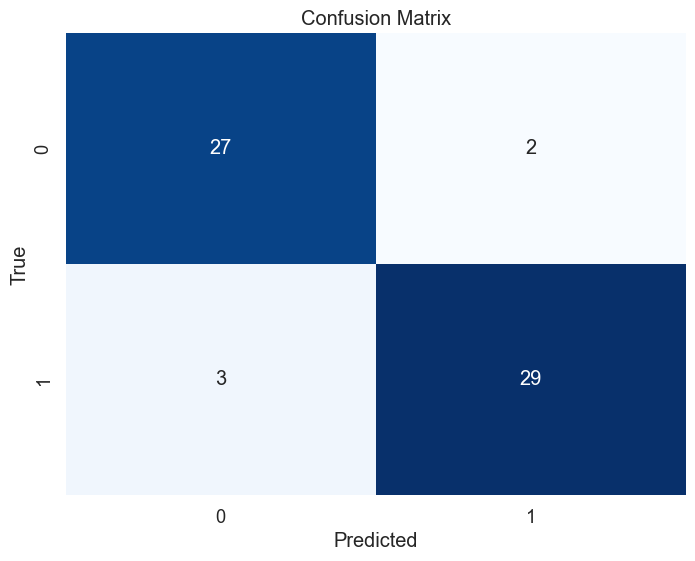

In [35]:
y_pred = rf_best.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
        6.4 Receiver Operator Characteristic (ROC)
    </p>
</div>


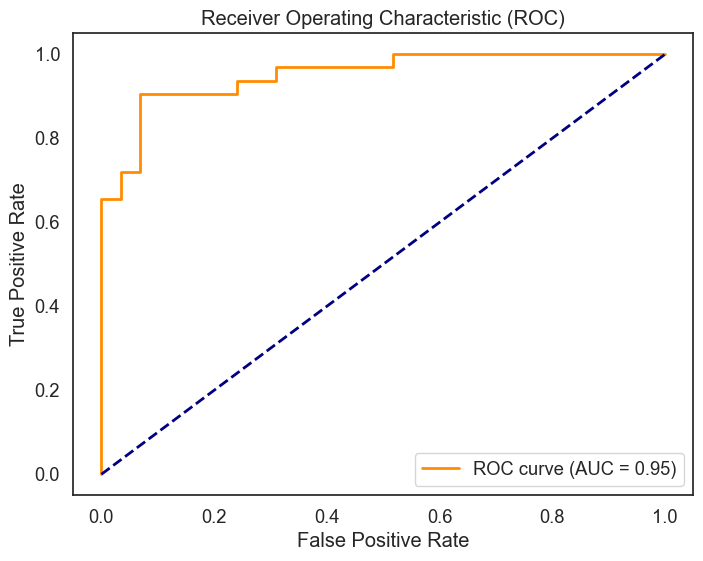

In [36]:
y_pred_proba = rf_best.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


Another common metric is the Area Under the Curve, or AUC. This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows,

* 0.90 - 1.00 = excellent
* 0.80 - 0.90 = good
* 0.70 - 0.80 = fair
* 0.60 - 0.70 = poor
* 0.50 - 0.60 = fail

<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
        6.5 Features Importance
    </p>
</div>


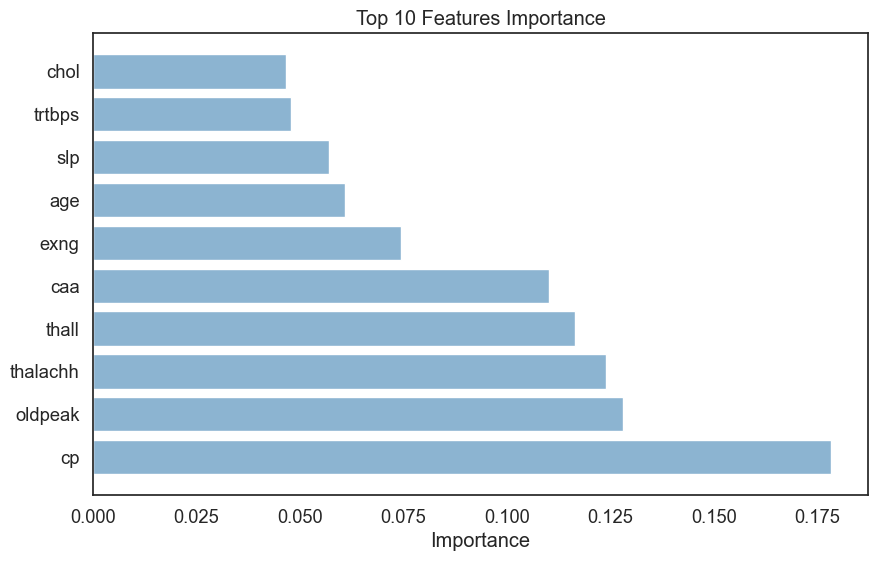

Feature Importance:
     Feature  Importance
2         cp    0.178243
9    oldpeak    0.127916
7   thalachh    0.123869
12     thall    0.116385
11       caa    0.110148


In [37]:
rf_best.fit(X, y)

feature_importances = rf_best.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Features Importance')
plt.show()


print("Feature Importance:")
print(feature_importance_df.head())



<div style="background-color: white; padding: 10px; border-radius: 5px; color: #0000FF;">
    <p style="font-size: 24px; font-weight: bold;">
        If you liked this notebook, please upvote 😊
   </p>
</div>


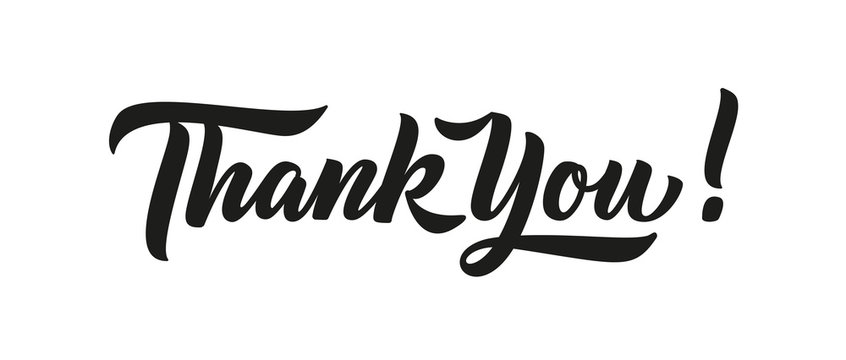

In [38]:
X_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
132,-1.038462,1,1,-0.50,0.854902,0,1,0.290076,0,-0.5000,2,0,2
203,0.961538,1,2,2.50,0.525490,1,0,-0.076336,1,0.5000,1,0,3
197,0.884615,1,0,-0.25,0.211765,1,1,0.320611,0,-0.3750,1,2,3
75,-0.038462,0,1,0.25,0.149020,0,0,0.259542,0,0.3750,1,0,2
177,0.653846,1,2,0.50,1.482353,0,1,0.167939,0,-0.5000,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,-1.115385,1,0,-1.00,-1.074510,0,0,0.167939,0,-0.5000,2,0,3
71,-0.346154,1,2,-1.80,-0.211765,0,1,0.045802,1,-0.5000,2,1,3
106,1.038462,1,3,1.50,-0.101961,1,0,-0.656489,0,-0.4375,1,1,2
271,0.423077,1,3,0.20,-0.101961,0,1,-0.229008,0,1.1250,1,2,2


In [ ]:
import joblib as jb
jb.dump(logmodel,'Liver_Disease_Prediction.joblib')
